In [1]:
import cv2
import json
import math
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import re

from pathlib import Path
from PIL import Image

%matplotlib inline

cwd = Path.cwd()
cwd

PosixPath('/Users/farhanoktavian/imperial/thesis/sandbox/preprocess_extract')

In [7]:
COLOR_DICT = {
    'Blood': 'red',
    'Blood vessel': 'blue',
    'Arachnoid': 'green',
    'Tumour Core': 'yellow',
    'Cortical Surface': 'cyan',
    'Tumour Margins': 'magenta',
    'White Matter': 'white',
}

RGB_IMG_PATTERN = '.*\.JPG'
MASK_PATTERN = '.*\.json'

class SegmentedImage:

    def __init__(self, img_path, mask_path=None):
        self.img = self._import_image(img_path)
        self.mask = self._import_mask(mask_path)
    

    def _import_image(self, img_path):
        return np.asarray(Image.open(img_path))
    

    def _import_mask(self, mask_path):
        if mask_path == None:
            return None
        seg_dict = json.load(mask_path.open())
        return seg_dict


# Image Plotting
def plot_image(image_obj, ax=None):

    if ax == None:
        fig, ax = plt.subplots()

    if hasattr(image_obj, 'img'):
        img = image_obj.img
        mask = image_obj.mask.get('shapes')
        ax.imshow(img)
    else:
        img = image_obj
        mask = None
        ax.imshow(img, norm=colors.Normalize(), cmap='gray')
    ax.axis('off')

    if mask != None:
        for shape in mask:
            if shape['shape_type'] == 'linestrip':
                x, y = zip(*shape['points'])
                ax.plot(x, y, linewidth=2, color=COLOR_DICT[shape['label']], alpha=0.3)
                ax.legend(handles=[mpatches.Patch(color=COLOR_DICT[label], label=label) for label in COLOR_DICT.keys()])
            if shape['shape_type'] == 'polygon':
                x, y = zip(*shape['points'])
                ax.fill(x, y, color=COLOR_DICT[shape['label']], alpha=0.3)
                ax.legend(handles=[mpatches.Patch(color=COLOR_DICT[label], label=label) for label in COLOR_DICT.keys()])


def plot_images(image_objs):
    fig, axes = plt.subplots(math.ceil(len(image_objs)/3), 3)
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i >= len(image_objs):
            ax.axis('off')
            continue
        plot_image(image_objs[i], ax)
    
    plt.legend(bbox_to_anchor=(1,0), loc="lower right", handles=[mpatches.Patch(color=COLOR_DICT[label], label=label) for label in COLOR_DICT.keys()])
    plt.tight_layout()
    plt.show()

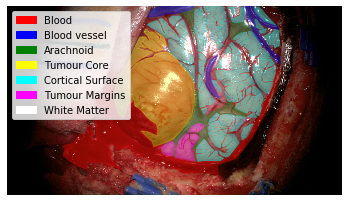

In [8]:
seg_folder = Path(cwd, 'data', 'definitive-segmentation', 'HS017 Capillary excluded')
seg_folders = [x for x in seg_folder.iterdir() if x.is_dir()]
seg_folders.sort()

seg_files = []
for fold in seg_folders:
    img_path = [x for x in fold.iterdir() if re.match(RGB_IMG_PATTERN, x.name)][0]
    mask_path = [x for x in fold.iterdir() if re.match(MASK_PATTERN, x.name)][0]
    seg_files.append(SegmentedImage(img_path, mask_path))


plot_image(seg_files[0])